In [1]:
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#setting parameters, gathering data and basic data preprocessing
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# pulling the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
#building a basic model with 2 conv layers followed by max pooling, then dropout and then fully connected with dropout culminating in softmax
basic_model = Sequential()
basic_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
basic_model.add(Conv2D(64, (3, 3), activation='relu'))
basic_model.add(MaxPooling2D(pool_size=(2, 2)))
basic_model.add(Dropout(0.25))
basic_model.add(Flatten())
basic_model.add(Dense(128, activation='relu'))
basic_model.add(Dropout(0.5))
basic_model.add(Dense(num_classes, activation='softmax'))

In [4]:
#training and testing the basic model
basic_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adadelta",
              metrics=['accuracy'])

basic_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

train_score = basic_model.evaluate(x_train, y_train, verbose=0)
test_score = basic_model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/12
469/469 [==============================] - 193s 409ms/step - loss: 19.7723 - accuracy: 0.1502 - val_loss: 2.9787 - val_accuracy: 0.4288
Epoch 2/12
469/469 [==============================] - 187s 399ms/step - loss: 8.2760 - accuracy: 0.2574 - val_loss: 1.3863 - val_accuracy: 0.5829
Epoch 3/12
469/469 [==============================] - 186s 396ms/step - loss: 4.3947 - accuracy: 0.3172 - val_loss: 1.2593 - val_accuracy: 0.5784
Epoch 4/12
469/469 [==============================] - 187s 398ms/step - loss: 2.8771 - accuracy: 0.3343 - val_loss: 1.4221 - val_accuracy: 0.5289
Epoch 5/12
469/469 [==============================] - 187s 399ms/step - loss: 2.3088 - accuracy: 0.3404 - val_loss: 1.5158 - val_accuracy: 0.5108
Epoch 6/12
469/469 [==============================] - 190s 404ms/step - loss: 2.0662 - accuracy: 0.3482 - val_loss: 1.5101 - val_accuracy: 0.5189
Epoch 7/12
469/469 [==============================] - 190s 405ms/step - loss: 1.9335 - accuracy: 0.3684 - val_loss: 1.4602 

In [5]:
#training and testing the basic model
basic_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

basic_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

train_score = basic_model.evaluate(x_train, y_train, verbose=0)
test_score = basic_model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/12
469/469 [==============================] - 189s 401ms/step - loss: 0.4181 - accuracy: 0.8913 - val_loss: 0.0674 - val_accuracy: 0.9782
Epoch 2/12
469/469 [==============================] - 177s 377ms/step - loss: 0.1415 - accuracy: 0.9597 - val_loss: 0.0554 - val_accuracy: 0.9824
Epoch 3/12
469/469 [==============================] - 176s 375ms/step - loss: 0.0990 - accuracy: 0.9710 - val_loss: 0.0491 - val_accuracy: 0.9841
Epoch 4/12
469/469 [==============================] - 177s 377ms/step - loss: 0.0836 - accuracy: 0.9755 - val_loss: 0.0410 - val_accuracy: 0.9868
Epoch 5/12
469/469 [==============================] - 177s 378ms/step - loss: 0.0717 - accuracy: 0.9785 - val_loss: 0.0388 - val_accuracy: 0.9885
Epoch 6/12
469/469 [==============================] - 187s 398ms/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0421 - val_accuracy: 0.9872
Epoch 7/12
469/469 [==============================] - 185s 396ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0402 -

In [ ]:
#building a slightly deeper model with 2 rounds of double convolution followed by pooling and dropout before fully connected network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/12
469/469 [==============================] - 212s 450ms/step - loss: 0.9359 - accuracy: 0.7461 - val_loss: 0.0939 - val_accuracy: 0.9714
Epoch 2/12
469/469 [==============================] - 208s 443ms/step - loss: 0.1770 - accuracy: 0.9471 - val_loss: 0.0517 - val_accuracy: 0.9837
Epoch 3/12
469/469 [==============================] - 211s 450ms/step - loss: 0.1229 - accuracy: 0.9642 - val_loss: 0.0392 - val_accuracy: 0.9873
Epoch 4/12
469/469 [==============================] - 211s 451ms/step - loss: 0.1013 - accuracy: 0.9708 - val_loss: 0.0337 - val_accuracy: 0.9899
Epoch 5/12
469/469 [==============================] - 208s 444ms/step - loss: 0.0861 - accuracy: 0.9750 - val_loss: 0.0338 - val_accuracy: 0.9885
Epoch 6/12
469/469 [==============================] - 212s 451ms/step - loss: 0.0800 - accuracy: 0.9761 - val_loss: 0.0284 - val_accuracy: 0.9905
Epoch 7/12
469/469 [==============================] - 214s 457ms/step - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.0286 -

In [ ]:
#check the data
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
#Scale values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
#Image Augmentation by rotation, scaling and translation
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

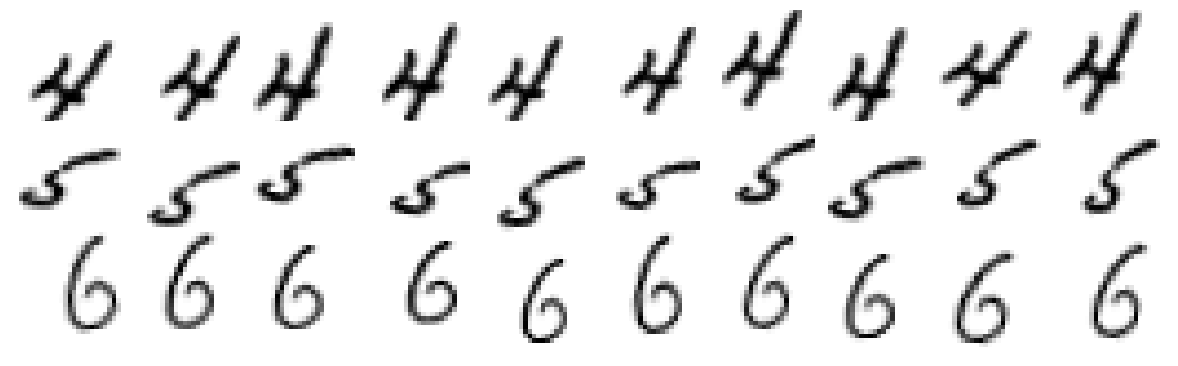

In [11]:
#Checkout the new augmented images
x_train3 = x_train[9,].reshape((1,28,28,1))
y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    x_train2, y_train2 = datagen.flow(x_train3,y_train3).next()
    plt.imshow(x_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: x_train3 = x_train[11,].reshape((1,28,28,1))
    if i==19: x_train3 = x_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
#Annealing the learning rate
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
#Train the model
epochs = 10
trained_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
        epochs = epochs, steps_per_epoch = x_train.shape[0]//64,  
        validation_data = (x_test,y_test), callbacks=[annealer], verbose=1)
print(max(trained_model.history['accuracy']))
print(max(trained_model.history['val_accuracy']))

Epoch 1/10


<ipython-input-13-2e524c39cf95>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),


937/937 [==============================] - 317s 335ms/step - loss: 0.3192 - accuracy: 0.9025 - val_loss: 0.0425 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 2/10
937/937 [==============================] - 312s 333ms/step - loss: 0.0991 - accuracy: 0.9695 - val_loss: 0.0333 - val_accuracy: 0.9894 - lr: 9.5000e-04
Epoch 3/10
937/937 [==============================] - 315s 336ms/step - loss: 0.0740 - accuracy: 0.9778 - val_loss: 0.0250 - val_accuracy: 0.9911 - lr: 9.0250e-04
Epoch 4/10
937/937 [==============================] - 314s 335ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0205 - val_accuracy: 0.9937 - lr: 8.5737e-04
Epoch 5/10
937/937 [==============================] - 316s 337ms/step - loss: 0.0563 - accuracy: 0.9837 - val_loss: 0.0240 - val_accuracy: 0.9919 - lr: 8.1451e-04
Epoch 6/10
937/937 [==============================] - 314s 335ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0231 - val_accuracy: 0.9928 - lr: 7.7378e-04
Epoch 7/10
937/937 [=================

In [ ]:
trained_model.history.keys()

In [ ]:
print('Train loss:', max(trained_model.history['loss']))
print('Train accuracy:', max(trained_model.history['accuracy']))
print('Test loss:', max(trained_model.history['val_loss']))
print('Test accuracy:', max(trained_model.history['val_accuracy']))